In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
students_data = pd.read_csv("Student_Engagement_Data.csv")

In [3]:
students_data.shape

(10000, 10)

In [4]:
students_data["Date"] = pd.to_datetime(students_data["Date"])

In [5]:
# Basic Statistics Summary
print("Dataset Info:")
print(students_data.info())
print("============================================================")
print("\nDataset Description")
print(students_data.describe(include="all"))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Student ID                10000 non-null  int64         
 1   Session ID                10000 non-null  int64         
 2   Date                      10000 non-null  datetime64[ns]
 3   EEG Data (PSD Features)   10000 non-null  object        
 4   Engagement Level          10000 non-null  object        
 5   Attention Level           10000 non-null  object        
 6   Internet Connectivity     10000 non-null  object        
 7   Adaptivity Level          10000 non-null  object        
 8   Learning Mode Prediction  10000 non-null  object        
 9   Performance Metrics       10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 781.4+ KB
None

Dataset Description
         Student ID    Session ID    

In [6]:
# Missing Values
print("\nMissing Values per Columns")
print(students_data.isnull().sum())


Missing Values per Columns
Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64


In [7]:
# Count Overall Learning Modes
print("\nLearning Mode Counts:")
print(students_data['Learning Mode Prediction'].value_counts())


Learning Mode Counts:
Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64


In [8]:
def level_to_score(level):
    if level == "Low":
        return 1
    elif level == "Moderate":
        return 2
    elif level == "High":
        return 3
    else:
        return None

students_data["Engagement Level"] = students_data["Engagement Level"].apply(level_to_score)
students_data["Attention Level"] = students_data["Attention Level"].apply(level_to_score)

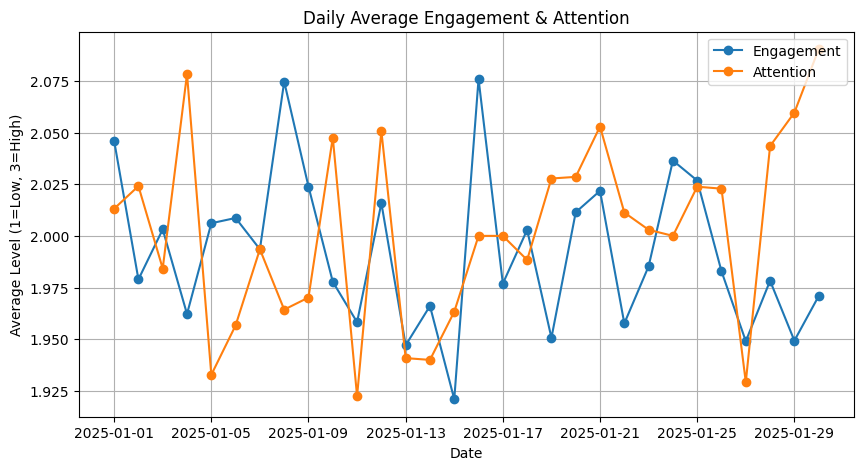

In [9]:
# Daily average Engagement & Attention Levels
plt.figure(figsize=(10,5))
daily_avg = students_data.groupby('Date')[['Engagement Level', 'Attention Level']].mean()
plt.plot(daily_avg.index, daily_avg["Engagement Level"], label="Engagement",marker ="o")
plt.plot(daily_avg.index, daily_avg["Attention Level"], label="Attention",marker ="o")
plt.xlabel("Date")
plt.ylabel("Average Level (1=Low, 3=High)")
plt.title("Daily Average Engagement & Attention")
plt.legend()
plt.grid(True)
plt.show()

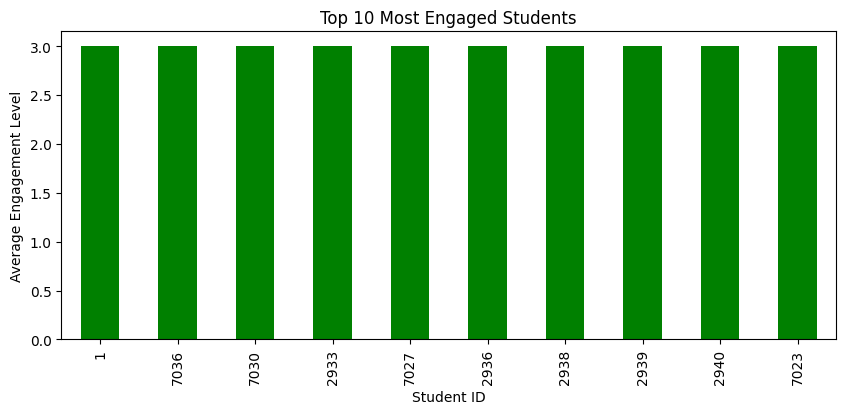

In [10]:
# Most & Least Engaged Students
student_avg_engagement = students_data.groupby('Student ID')['Engagement Level'].mean().sort_values(ascending=False)

# Top 10 (Most Engaged)
plt.figure(figsize=(10,4))
student_avg_engagement.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Engaged Students")
plt.ylabel("Average Engagement Level")
plt.show()

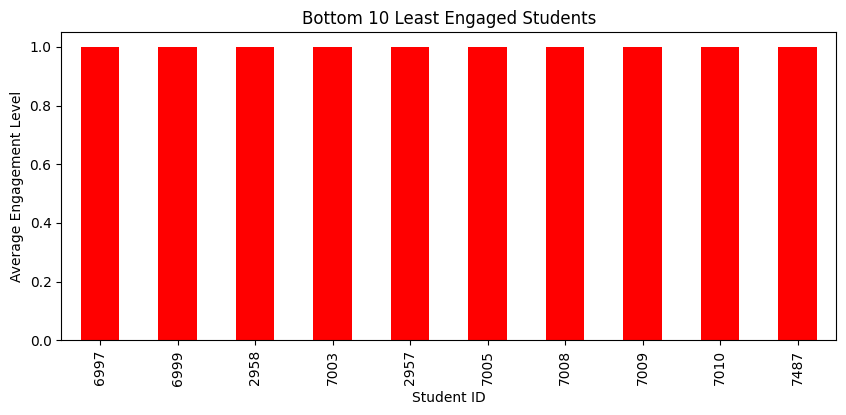

In [11]:
# Bottom 10  (Least Engaged)
plt.figure(figsize=(10,4))
student_avg_engagement.tail(10).plot(kind='bar', color='red')
plt.title("Bottom 10 Least Engaged Students")
plt.ylabel("Average Engagement Level")
plt.show()

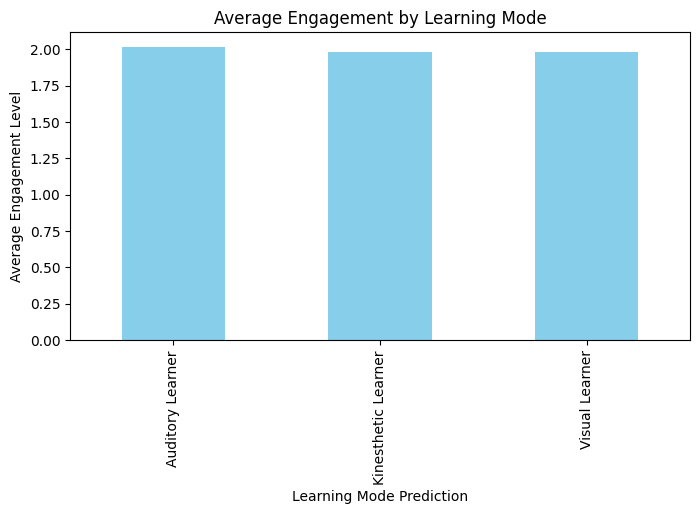

In [12]:
# Engagement By Learning Mode
learning_mode_engagement = students_data.groupby('Learning Mode Prediction')['Engagement Level'].mean()
plt.figure(figsize=(8,4))
learning_mode_engagement.plot(kind='bar', color='skyblue')
plt.title("Average Engagement by Learning Mode")
plt.ylabel("Average Engagement Level")
plt.show()